In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [343]:
Train_data= pd.read_csv('titanic/train.csv')

Test_data = pd.read_csv('titanic/test.csv')


In [344]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [345]:
Train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [346]:
Test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<h3> Age and Cabin data missingmwe will probably exclude from the prediction

In [347]:
Train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [348]:
# delete unnecessary feature from dataset
Train_data.drop('Name', axis=1, inplace=True)
Test_data.drop('Name', axis=1, inplace=True)

### Visualization Of Data (EDA)

##### Effect of passenger class 

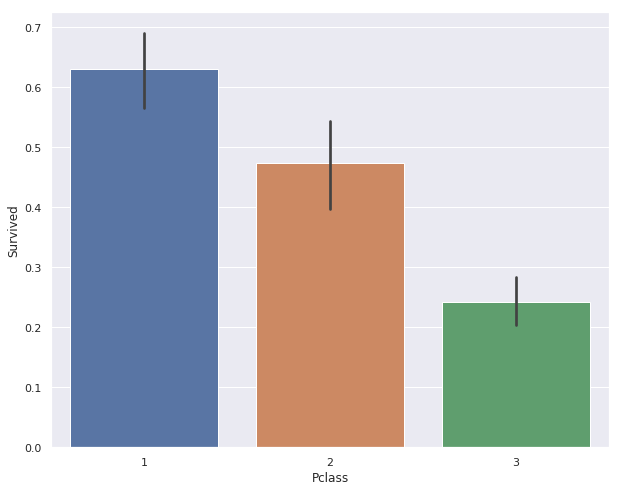

In [349]:
fig, axes = plt.subplots(figsize=(10, 8))

sns.barplot(x='Pclass', y='Survived', data=Train_data)


Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

##### Effect of Age and Sex 

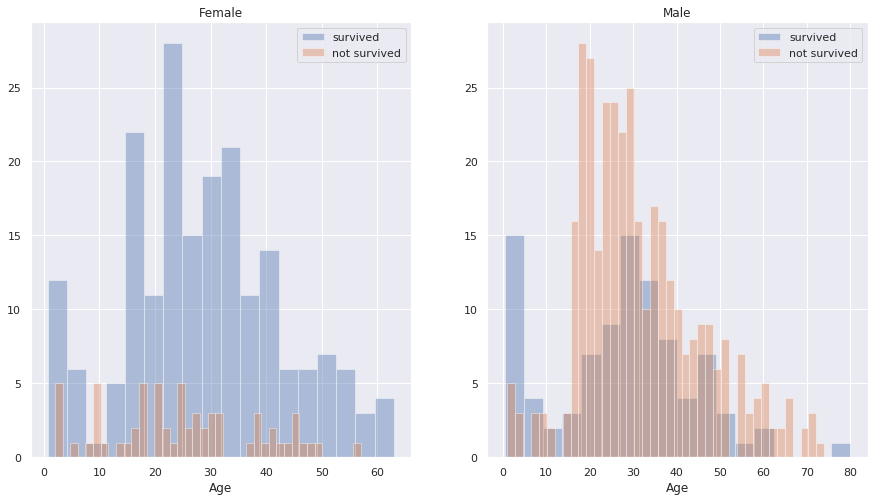

In [350]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 8))
women = Train_data[Train_data['Sex']=='female']

men = Train_data[Train_data['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

# Data Preprocessing
Drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability.

<p> I will not drop it from the test set, since it is required there for the submission.



In [351]:
data = [Train_data, Test_data]
for dataset in data:
    mean = Train_data["Age"].mean()
    std = Test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = Train_data["Age"].astype(int)

In [352]:
#USING MODE(most common station)

In [353]:
embarked_mode = Train_data['Embarked'].mode()
data = [Train_data, Test_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)


In [354]:
for dataset in data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

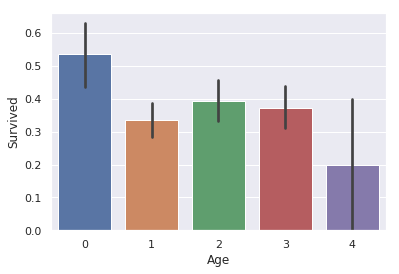

In [355]:
sns.barplot(x='Age', y='Survived', data=Train_data)


### Feature engineering
<p>
    Feature engineering is the process of using domain knowledge of the data
to create features (feature vectors) that make machine learning algorithms work.

In [356]:
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'

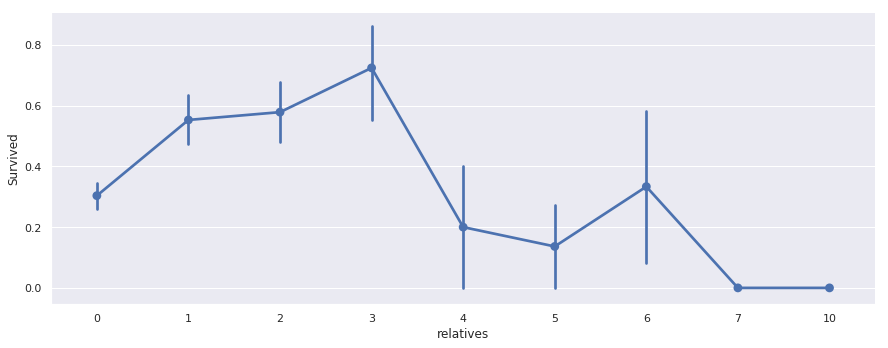

In [357]:
axes = sns.factorplot('relatives','Survived', 
                      data=Train_data, aspect = 2.5, );


## Data Mapping

In [358]:
sex_mapping = {"male": 0, "female": 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

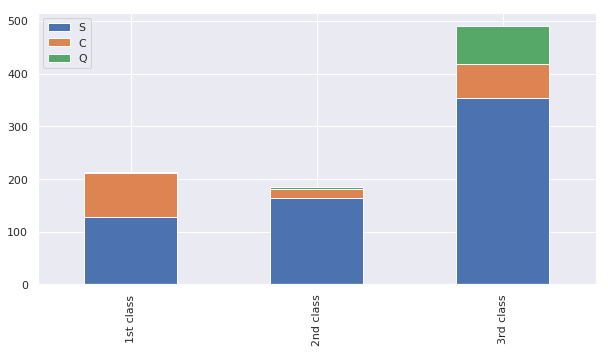

In [359]:
Pclass1 = Train_data[Train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = Train_data[Train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = Train_data[Train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [360]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [361]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [362]:
Train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,0,1,No
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,1,1,No
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,0,Yes
3,4,1,1,1,2,1,0,113803,53.1000,C123,0,1,No
4,5,0,3,0,2,0,0,373450,8.0500,NaN,0,0,Yes


In [363]:
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]


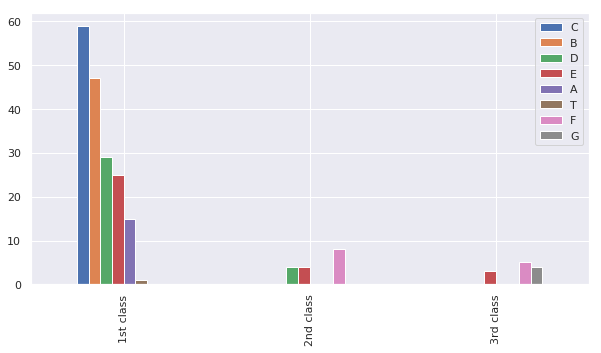

In [364]:
Pclass1 = Train_data[Train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = Train_data[Train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = Train_data[Train_data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=False, figsize=(10,5))

In [365]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

# fill missing Fare with median fare for each Pclass


In [366]:
Train_data["Cabin"].fillna(Train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
Test_data["Cabin"].fillna(Test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [367]:
Train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone
0,1,0,3,0,1,1,0,A/5 21171,7.2500,2.0,0,1,No
1,2,1,1,1,3,1,0,PC 17599,71.2833,0.8,1,1,No
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,2.0,0,0,Yes
3,4,1,1,1,2,1,0,113803,53.1000,0.8,0,1,No
4,5,0,3,0,2,0,0,373450,8.0500,2.0,0,0,Yes


In [368]:
Test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone
0,892,3,0,1,0,0,330911,7.8292,2.0,2,0,Yes
1,893,3,1,3,1,0,363272,7.0000,2.0,0,1,No
2,894,2,0,1,0,0,240276,9.6875,2.0,2,0,Yes
3,895,3,0,2,0,0,315154,8.6625,2.0,0,0,Yes
4,896,3,1,2,1,1,3101298,12.2875,2.0,0,2,No


In [369]:
Train_data["FamilySize"] = Train_data["SibSp"] + Train_data["Parch"] + 1
Test_data["FamilySize"] = Test_data["SibSp"] + Test_data["Parch"] + 1


In [370]:
Test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone,FamilySize
0,892,3,0,1,0,0,330911,7.8292,2.0,2,0,Yes,1
1,893,3,1,3,1,0,363272,7.0000,2.0,0,1,No,2
2,894,2,0,1,0,0,240276,9.6875,2.0,2,0,Yes,1
3,895,3,0,2,0,0,315154,8.6625,2.0,0,0,Yes,1
4,896,3,1,2,1,1,3101298,12.2875,2.0,0,2,No,3


## Drop Features


In [371]:
features_drop = ['Ticket', 'SibSp', 'Parch']
Train_data = Train_data.drop(features_drop, axis=1)
Test_data = Test_data.drop(features_drop, axis=1)
Train_data = Train_data.drop(['PassengerId'], axis=1)

In [372]:
train_data = Train_data.drop(['Survived', 'travelled_alone'],axis=1)
Test_data = Test_data.drop(['travelled_alone','Fare'], axis=1)

target = Train_data['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [373]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,relatives,FamilySize
0,3,0,1,7.2500,2.0,0,1,2
1,1,1,3,71.2833,0.8,1,1,2
2,3,1,1,7.9250,2.0,0,0,1
3,1,1,2,53.1000,0.8,0,1,2
4,3,0,2,8.0500,2.0,0,0,1
5,3,0,3,8.4583,2.0,2,0,1
6,1,0,3,51.8625,1.6,0,0,1
7,3,0,0,21.0750,2.0,0,4,5
8,3,1,2,11.1333,2.0,0,2,3
9,2,1,0,30.0708,1.8,1,1,2


In [374]:
from sklearn.ensemble import RandomForestClassifier


In [375]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [376]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.72222222 0.85393258 0.7752809  0.74157303 0.83146067 0.78651685
 0.85393258 0.7752809  0.7752809  0.7752809 ]


In [377]:
round(np.mean(score)*100, 2)

78.91

In [378]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

# test_data = Test_data.drop(["PassengerId","travelled_alone"], axis=1).copy()
prediction = clf.predict(Test_data)

In [380]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [379]:
submission = pd.DataFrame({
        "PassengerId": Test_data["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)